In [1]:
####################################################################################################


                    # Compare Wikis

####################################################################################################

In [17]:
####################################################################################################

                    # Import all the things

####################################################################################################

import re
from os import path
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageEnhance
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
from io import BytesIO
import datetime
import random
import wikipedia

from PIL import Image
import PIL.ImageOps  

In [3]:

####################################################################################################

                    # Import default stopwords to then add on to

####################################################################################################


stopwords = set(STOPWORDS)
stopwords.add('us')
stopwords.add('let')
stopwords.add('one')

stopwords.add('now')
stopwords.add('away')
stopwords.add('stop')
stopwords.add('the')
stopwords.add('no')
stopwords.add('see')
stopwords.add('camera')
stopwords.add('look')
stopwords.add('left')
stopwords.add('right')
stopwords.add('around')
stopwords.add('toward')
stopwords.add('over')
stopwords.add('behind')

stopwords.add('You')
stopwords.add('What')
stopwords.add('Got')
stopwords.add('got')
stopwords.add('Sir')
stopwords.add('Look')
stopwords.add("We're")
stopwords.add('oh')
stopwords.add('going')
stopwords.add("'ve")
stopwords.add("will")
stopwords.add("well")

stopwords.add('Yes')
stopwords.add('yes')
stopwords.add('Hi')
stopwords.add('hi')
stopwords.add("'m'")
stopwords.add("I'm")
stopwords.add("ll")



####################################################################################################

                    # Define the functions to scrape the scripts
                    # and create the word cloud

####################################################################################################

def getcorpus_wiki(Title):
    soup = BeautifulSoup(wikipedia.WikipediaPage(title = Title).content, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def getcorpus_url(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    words = soup.get_text()
    words= re.sub("[^a-zA-Z' ]+", " ", words)
    return words

def getcorpus_local(local):
    with open(str(local)+'.txt') as f:
        soup = BeautifulSoup(f, "html.parser")
        words = soup.get_text()
        words= re.sub("[^a-zA-Z' ]+", " ", words)
        return words



####################################################################################################

                    # Nebulize = turn into a cloud

####################################################################################################

def nebulize(text, imgloc, imgurl,maxsize ,
               maxwords, save, title, color, font, 
              figsize, fontsize):
    if imgloc == "local":
        mask = np.array(Image.open(imgurl))
    else:
        response1 = requests.get(imgurl)
        img = Image.open(BytesIO(response1.content))
        mask = np.array(img)
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\\' +str(font)+'.ttf', stopwords = stopwords, 
                          background_color="white", max_words=maxwords,max_font_size=maxsize,  
                          mask=mask, collocation_threshold=150).generate(text)
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[figsize,figsize])
    plt.title(title, size=fontsize)
    if color =="random":
        plt.imshow(wordcloud.recolor(color_func=random_color_func), interpolation="bilinear")
    elif color =="green":
        plt.imshow(wordcloud.recolor(color_func=green_func), interpolation="bilinear")
    elif color =="red":
        plt.imshow(wordcloud.recolor(color_func=red_func), interpolation="bilinear")
    elif color =="orange":
        plt.imshow(wordcloud.recolor(color_func=orange_func), interpolation="bilinear")
    elif color =="yellow":
        plt.imshow(wordcloud.recolor(color_func=yellow_func), interpolation="bilinear")
    elif color == "teal":
        plt.imshow(wordcloud.recolor(color_func=teal_func), interpolation="bilinear")
    elif color == "lightblue":
        plt.imshow(wordcloud.recolor(color_func=lightblue_func), interpolation="bilinear")
    elif color =='darkblue':
        plt.imshow(wordcloud.recolor(color_func=darkblue_func), interpolation="bilinear")
    elif color == "purple":
        plt.imshow(wordcloud.recolor(color_func=purple_func), interpolation="bilinear")
    elif color =="pink":
        plt.imshow(wordcloud.recolor(color_func=pink_func), interpolation="bilinear")
    else:
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    if save == "yes":
        plt.savefig("viz"+str(datetime.datetime.now().second)+str(datetime.datetime.now().minute)+".png", format="png")
    plt.show()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    
    plt.show()

    
####################################################################################################

                    # get rid of some pesky touples

####################################################################################################

   
    
def remove_tuples(df):
    df=df.replace('CUT TO', '')
    df=df.replace(' He ', '')
    df=df.replace('TO INT', '')
    df=df.replace(' go ', '')
    df=df.replace(' turn', '')
    df=df.replace(' goes', '')
    df=df.replace(' is ', '')
    df=df.replace(' hi ', '')
    df=df.replace(' what ', '')
    df=df.replace(' one ', '')
    df=df.replace(' take ', '')
    df=df.replace(' come ', '')
    df=df.replace(' way ', '')
    df=df.replace(' you ', '')
    df=df.replace(' TO EXT ', '')
    df=df.replace(' back ', '')
    df=df.replace(' tng ', '')
    df=df.replace(' wch ', '')
    df=df.replace('EXT  SPACE', '')
    df=df.replace(' THE DEATH ', '')
    df=df.replace(' INT ', '')
    df=df.replace(' toward the ', '')
    df=df.replace(' look ', '')
    df=df.replace(' robot ', '')
    df=df.replace(' going to ', '')
    df=df.replace(' pirateship ', '')
    df=df.replace(' the rebel ', '')
    df=df.replace(' wing ', '')
    df=df.replace(' fighter ', '')
    df=df.replace(' begins to ', '')
    df=df.replace(' his head ', '')
    df=df.replace(' turn ', '')
    df=df.replace(' luke look ', '')
    df=df.replace(' move ', '')
    df=df.replace(' the Death star ', ' death star ')
    df=df.replace(' over speaker ', '')
    df=df.replace(' over headset ', '')
    df=df.replace("'ve", ' ')

    return df

In [4]:
####################################################################################################

                    # Custom color palettes because why not

####################################################################################################


def green_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(87, 154), random.randint(0, 100) ,random.randint(0, 92))


def random_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 357), random.randint(0, 100) ,random.randint(0, 92))


def red_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(0, 6), random.randint(0, 100) ,random.randint(0, 92))




def orange_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(14, 38), random.randint(0, 100) ,random.randint(0, 92))




def yellow_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(39, 69), random.randint(0, 100) ,random.randint(0, 92))


def teal_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(147, 180), random.randint(0, 100) ,random.randint(0, 92))


def lightblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(180, 200), random.randint(0, 100) ,random.randint(0, 92))


def darkblue_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(208, 250), random.randint(0, 100) ,random.randint(0, 92))




def purple_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(256, 283), random.randint(0, 100) ,random.randint(0, 92))


def pink_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(%d, %d%%, %d%%)" % (random.randint(293, 341), random.randint(0, 100) ,random.randint(0, 92))



In [42]:
####################################################################################################

####################################################################################################

                    # Bernie Sander

####################################################################################################

####################################################################################################





Bern = getcorpus_wiki('Bernie Sanders')
Bern = remove_tuples(Bern)

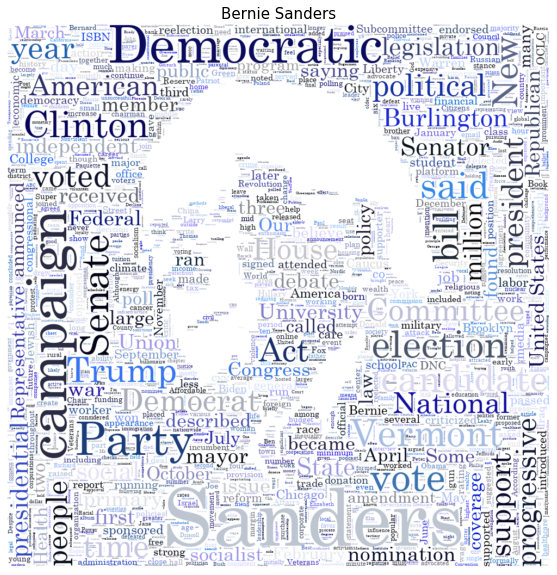

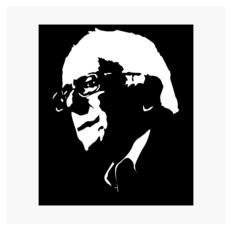

In [43]:
nebulize(Bern, "url", 
        "https://ih1.redbubble.net/image.1101750461.5197/pp,840x830-pad,1000x1000,f8f8f8.jpg",
         500, 7000, "yes", "Bernie Sanders", "darlkblue", "", 10, 15 )

In [ ]:
image = Image.open('11239604203_5b376cffc4_c.jpg')

inverted_image = PIL.ImageOps.invert(image)

inverted_image.save('inverted_bernie.png')

inverted_image

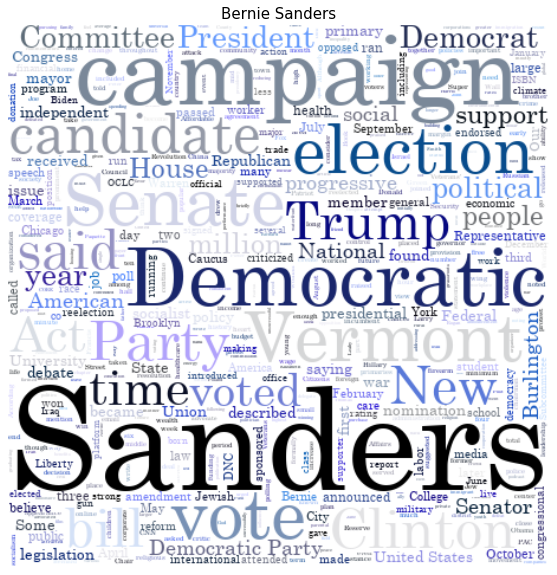

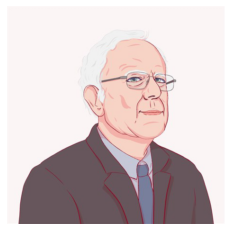

In [36]:





nebulize(Bern, "url", 
"https://media2.s-nbcnews.com/j/newscms/2019_17/2836941/bernie-sanders-illustrated-portrait-1x1-kh_349e27f125213c6dbef667a4f234029a.focal-460x460.jpg",
         600, 7000, "yes", "Bernie Sanders", "darkblue", "CENTURY", 10, 15 )

In [44]:
Don = getcorpus_wiki('Donald Trump')
Don = remove_tuples(Don)


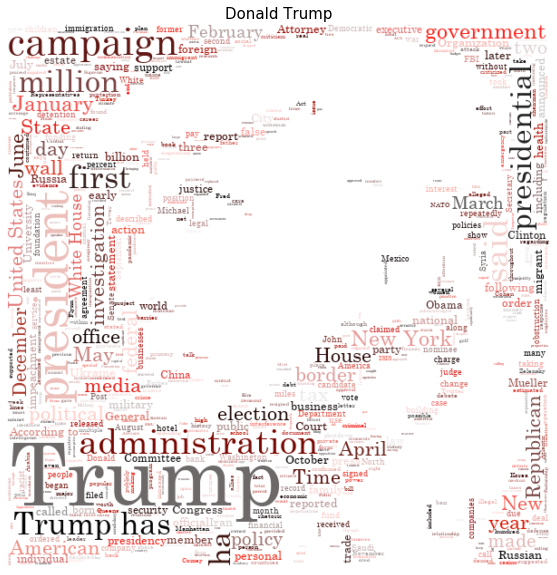

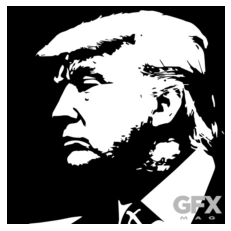

In [14]:
nebulize(Don, "url", 
        "https://gfxmag.com/wp-content/uploads/2016/06/vector-donald-trump-silhouette-clip-art-4.jpg",
         110, 7000, "yes", "Donald Trump", "red", "CENTURY", 10, 15 )

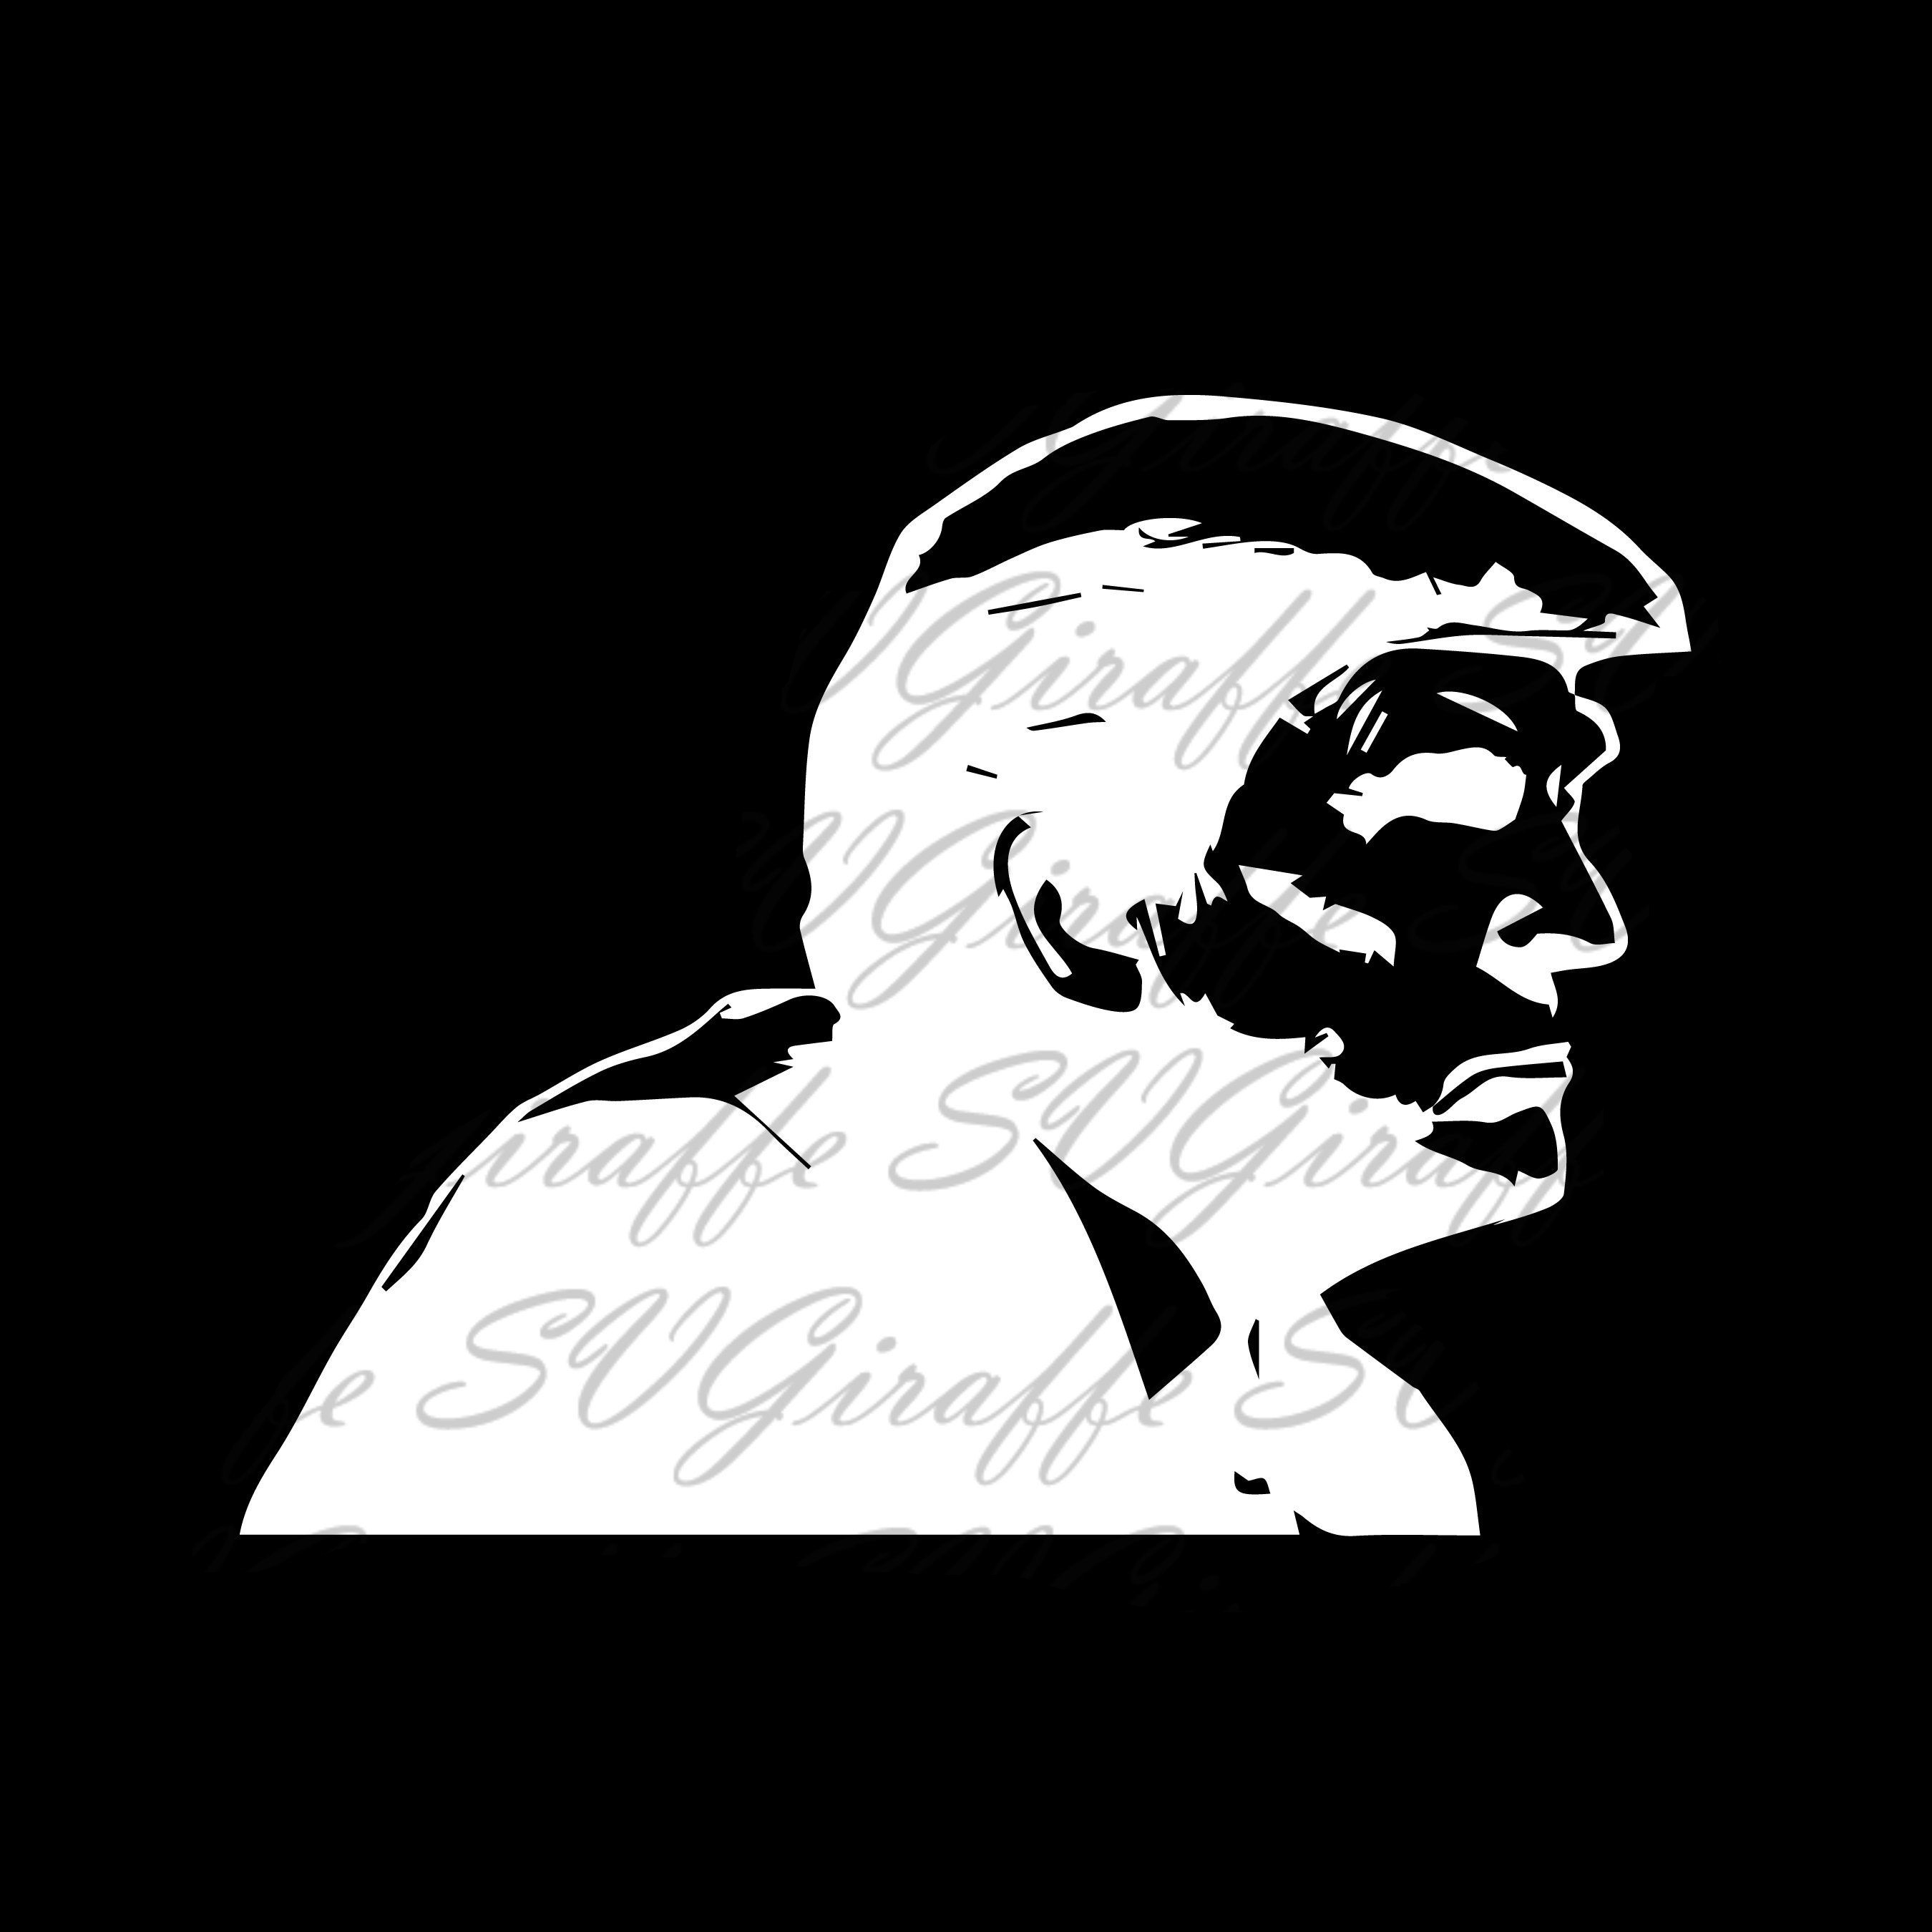

In [18]:

image = Image.open('279882d5c6b5f4437422bcde031e2d6b.jpg')

inverted_image = PIL.ImageOps.invert(image)

inverted_image.save('inverted_don.png')

inverted_image

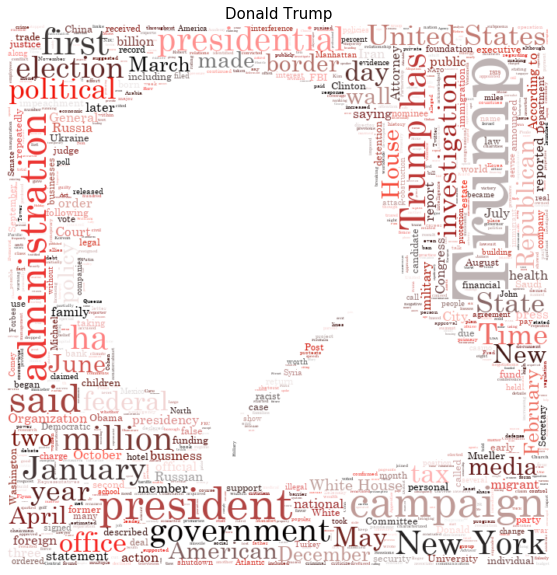

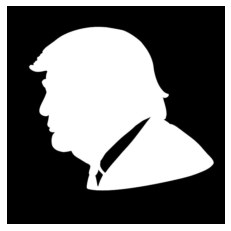

In [45]:
image = Image.open('don2.jpg')

inverted_image = PIL.ImageOps.invert(image)

inverted_image.save('inverted_don2.png')

inverted_image


nebulize(Don, "local", "inverted_don2.png",
         100, 7000, "yes", "Donald Trump", "red", "CENTURY", 10, 15 )

In [46]:
import itertools
import cv2
import os
import numpy as np

#User defined variables
name = "Bernie v Donald" + ".jpg" 
margin = 20 #Margin between pictures in pixels
w = 2 # Width of the matrix (nb of images)
h = 1 # Height of the matrix (nb of images)
n = w*h

filename_list =  ['viz1557.png', 'viz3457.png' ]





imgs = [cv2.imread(os.getcwd()+"/"+file) for file in filename_list]

#Define the shape of the image to be replicated 
#(all images should have the same shape)
img_h, img_w, img_c = imgs[0].shape

#Define the margins in x and y directions
m_x = margin
m_y = margin

#Size of the full size image
mat_x = img_w * w + m_x * (w - 1)
mat_y = img_h * h + m_y * (h - 1)

#Create a matrix of zeros of the right size and fill with 255 (so margins end up white)
imgmatrix = np.zeros((mat_y, mat_x, img_c),np.uint8)
imgmatrix.fill(255)

#Prepare an iterable with the right dimensions
positions = itertools.product(range(h), range(w))

for (y_i, x_i), img in zip(positions, imgs):
    x = x_i * (img_w + m_x)
    y = y_i * (img_h + m_y)
    imgmatrix[y:y+img_h, x:x+img_w, :] = img

resized = cv2.resize(imgmatrix, (mat_x,mat_y), interpolation = cv2.INTER_AREA)
compression_params = [cv2.IMWRITE_JPEG_QUALITY, 100]
cv2.imwrite(name, resized, compression_params)

True